

# Project: Movie Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>


<a id='intro'></a>
## Introduction
This data set contains information
about 10,000 movies collected from
The Movie Database (TMDb),
including user ratings and revenue.


    ● Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.  
    
    ● There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is. 
    
    ● The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.  
                                                                                                     
Which genres are most popular from year to year?                                                                               
What is the most and least popular movie? 
 
 
 








In [154]:
# set up import statements for all of the packages that you

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#import operator

# Data Wrangling¶
 In this section of the report, I will load the data, check for cleanliness, and then trim and clean my dataset for analysis. 

### Assessing The Data

In [155]:
# Load your data
df = pd.read_csv('tmdb-movies.csv')

In [156]:
# print out a few lines. Perform operations to inspect data
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [157]:
#To find the number of movies and its characteritics
df.shape

(10866, 21)

In [158]:
#check for duplicates
sum(df.duplicated())

1

In [159]:
# look for instances of missing or possibly errant data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [160]:
# check the statistics
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


Maximum popularity is 32, min is 0.000065. Max movie release year is 2015, min is 1960. About 75% of the movies released are between the year 2006 and 2015.

### Data Cleaning
Remove columns that we will not use. we saw from the statistics that there are rows with null and 0 value, I will fill budget_adj and revenue_adj with the mean because removing them will affect the genres column.

In [161]:
# remove columns  that is not needed

df.drop(['budget', 'revenue', 'imdb_id', 'tagline', 'runtime', 'homepage', 'overview', 'keywords'], axis=1, inplace=True)


In [162]:
# Checking if those columns was removed
df.shape

(10866, 13)

In [163]:
# replace zero's with their mean
df=df.mask(df==0).fillna(df.mean())

C:\Users\Precious\AppData\Local\Temp/ipykernel_13884/1265008241.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df=df.mask(df==0).fillna(df.mean())


In [164]:
# Check if those rows with zero value has been filled
df.describe()

,id,popularity,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,217.389748,5.974922,2001.322658,2.675136e+07,7.980243e+07
std,92130.136561,1.000185,575.619058,0.935142,12.812941,3.050850e+07,1.365610e+08
min,5.000000,0.000065,10.000000,1.500000,1960.000000,9.210911e-01,2.370705e+00
25%,10596.250000,0.207583,17.000000,5.400000,1995.000000,1.755104e+07,5.136436e+07
50%,20669.000000,0.383856,38.000000,6.000000,2006.000000,1.755104e+07,5.136436e+07
75%,75610.000000,0.713817,145.750000,6.600000,2011.000000,2.085325e+07,5.136436e+07
max,417859.000000,32.985763,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [165]:
#remove duplicate
df.drop_duplicates(inplace=True)

In [166]:
#check if it was removed
sum(df.duplicated())

0

In [167]:
#remove na values from rows
df.dropna(axis=0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9772 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9772 non-null   int64  
 1   popularity            9772 non-null   float64
 2   original_title        9772 non-null   object 
 3   cast                  9772 non-null   object 
 4   director              9772 non-null   object 
 5   genres                9772 non-null   object 
 6   production_companies  9772 non-null   object 
 7   release_date          9772 non-null   object 
 8   vote_count            9772 non-null   int64  
 9   vote_average          9772 non-null   float64
 10  release_year          9772 non-null   int64  
 11  budget_adj            9772 non-null   float64
 12  revenue_adj           9772 non-null   float64
dtypes: float64(4), int64(3), object(6)
memory usage: 1.0+ MB


 After cleaning the data, we are left with 9772 movie samples 'rows' and 13 columns

<a id='eda'></a>
## Exploratory Data Analysis

> Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. 
### Research Question 1: Which genres are most popular from year to year?

In [168]:
#using the lambda function to output the first genre
df['genres'] = df.genres.str.split('|').apply(lambda x: x[0])

In [169]:
df.head(3)

,id,popularity,original_title,cast,director,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [170]:
#To get the count of genre in a particular year.
genre_count = pd.DataFrame({'count' : df.groupby(['release_year','genres']).size()}).reset_index()
genre_count.head(5)

,release_year,genres,count
0,1960,Action,8
1,1960,Adventure,2
2,1960,Comedy,7
3,1960,Crime,1
4,1960,Drama,5


In [171]:
#Create a dataframe with the most popular genre from 1960 to 2015
max = genre_count.iloc[genre_count.groupby(['release_year']).apply(lambda x: x['count'].idxmax())]
max.head()

,release_year,genres,count
0,1960,Action,8
9,1961,Comedy,8
21,1962,Drama,10
30,1963,Comedy,9
38,1964,Comedy,10


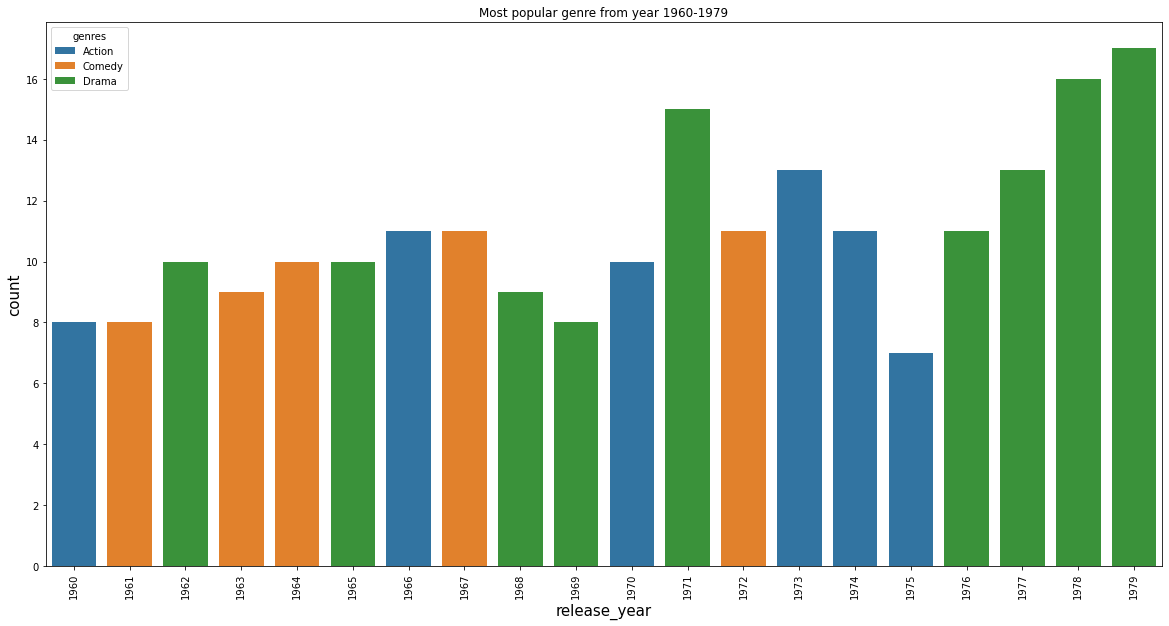

In [172]:
#bargraph that show the most popular genre in each year
plt.figure(figsize=(20,10))
# Dataframe with the most popular genre in a particular year
max_20 = genre_count.iloc[genre_count.groupby(['release_year']).apply(lambda x: x['count'].idxmax())].head(20)
sns.barplot(x="release_year", y="count", data=max_20, hue="genres", dodge=False)
plt.xlabel('release_year', fontsize=15)
plt.ylabel('count', fontsize=15)
plt.title('Most popular genre from year 1960-1979')
plt.xticks(rotation=90)
plt.show()

This shows the genre that appears most in a particular year.
In general the genre that appears to be most popular in many years is Drama. 

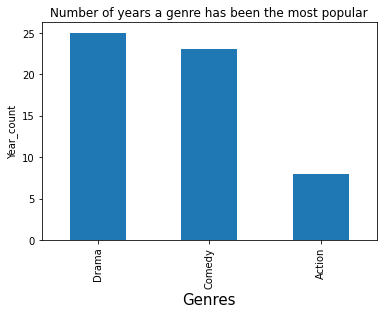

In [173]:
max['genres'].value_counts().plot(kind='bar', title='Number of years a genre has been the most popular')
plt.xlabel('Genres', fontsize=15)
plt.ylabel('Year_count');

From 1960-2015, the most popular movie genres are Drama, Comedy and Action. 

#### Now lets create a barplot of the most popular movie genre base on popularity column

When determining the most popular genre, I chose the popularity over voting average in the data set.

My choice was based on the fact that, no matter how popular a movie may be, no matter how many people would watch a movie, not all of them will vote, rate or take a poll on that movie.

This is evident in the given data set were a popularity of a certain movie is way higher that the number of people who vote or rate that movie.


Hence, using the vote_average to determine the popularity of a movie would not be ideal. It doesn't show the number of people who know or watched a movie, only the voters.

In [174]:
#Dataframe with genre popularity score from 1960 to 2015
gps = pd.DataFrame({'popularity' : df.groupby(['release_year','genres'])['popularity'].mean()}).reset_index()
gps.head(7)

,release_year,genres,popularity
0,1960,Action,0.590724
1,1960,Adventure,0.304992
2,1960,Comedy,0.392067
3,1960,Crime,0.269428
4,1960,Drama,0.687575
5,1960,Horror,0.254964
6,1960,Thriller,0.456165


In [175]:
#Dataframe with the most popular genre from 1960 to 2015
gmp = gps.iloc[gps.groupby(['release_year']).apply(lambda x: x['popularity'].idxmax())]
gmp.head()

,release_year,genres,popularity
4,1960,Drama,0.687575
8,1961,Adventure,1.394596
18,1962,Adventure,1.283631
29,1963,Animation,2.180410
36,1964,Adventure,0.736431


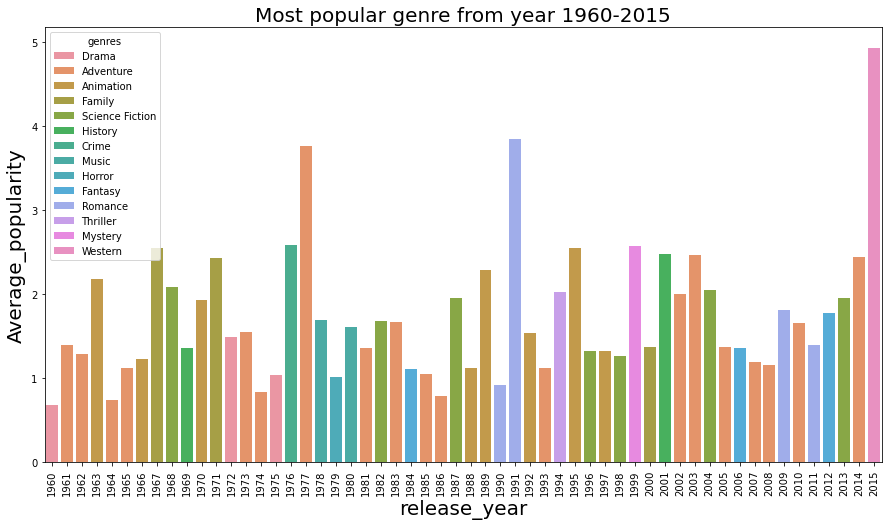

In [176]:
plt.figure(figsize=(15,8))
# Dataframe with the most popular genre in a particular year
sns.barplot(x="release_year", y="popularity", data=gmp, hue="genres", dodge=False)
plt.xlabel('release_year', fontsize=20)
plt.ylabel('Average_popularity', fontsize=20)
plt.title('Most popular genre from year 1960-2015', fontsize=20)
plt.xticks(rotation=90)
plt.show()

This graph shows the most popular genre base on their average popularity, from 1960 to 2015.
In 1960, Drama was the most popular movie genre, followed by Adventure which was the most popular in 1961. While in 2015, Western was the most popular.

It is also observed that the year 2015 has the highest maximum mean popularity score followed by 1991 and then 1977.

Also the year 1960 has the lowest maximum mean popularity score.



###### From the bargraph, we can also find how many times a genre appears most popular, but lets create a different bargraph for that.

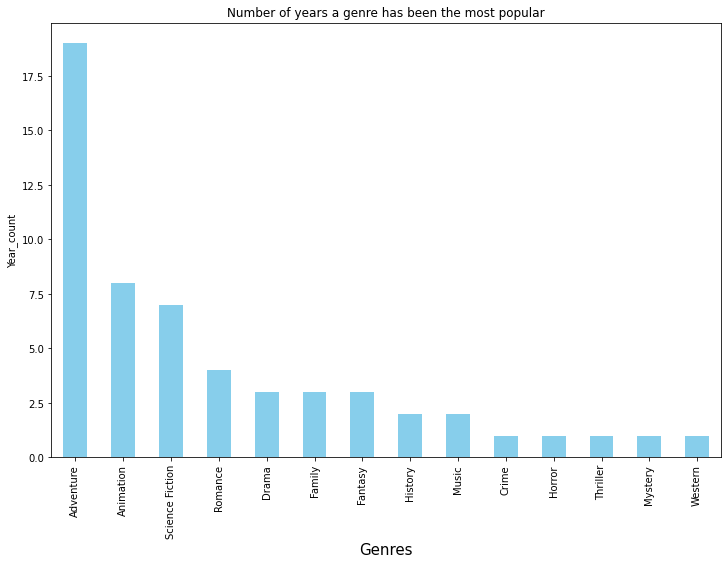

In [177]:
gmp['genres'].value_counts().plot(kind='bar', figsize=(12, 8), color ='skyblue', 
                                  title='Number of years a genre has been the most popular')
plt.xlabel('Genres', fontsize=15)
plt.ylabel('Year_count');

This chart clearly shows that Adventure is the most popular movie genre in many years(19 year count), followed by Animation which appears most popular in 8 different year. 

### Research Question 2: What is the most and least popular movie? what's the name of the movie  director 

In [178]:
#Dataframe with the most popular and least popular movies.
data = df[(df.popularity == df['popularity'].max()) | (df.popularity == df['popularity'].min())]
data

,id,popularity,original_title,cast,director,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
9977,32082,0.000188,The Hospital,George C. Scott|Diana Rigg|Richard Dysart|Barn...,Arthur Hiller,Mystery,Simcha Productions,12/14/71,10,6.4,1971,1.755104e+07,5.136436e+07


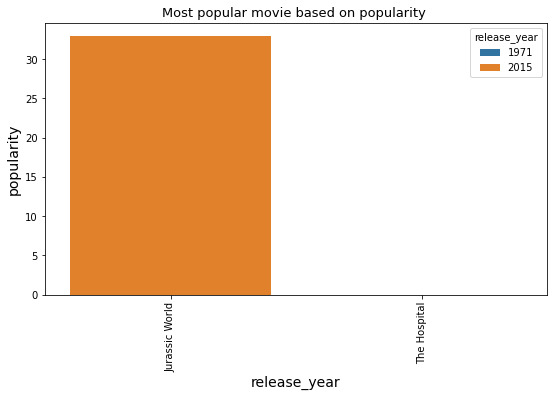

In [179]:
plt.figure(figsize=(9,5))
#bargraph that show the max and min movies based on popularity
sns.barplot(x="original_title", y="popularity", data=data, hue="release_year", dodge=False)
plt.xlabel('release_year', fontsize=14)
plt.ylabel('popularity', fontsize=14)
plt.title('Most popular movie based on popularity ', fontsize=13)
plt.xticks(rotation=90)
plt.show()

From the plot we can see that Jurassic World is the most popular movie which was release in the year 2015 and the least is The Hospital which was released in 1971. We can also see from the above dataframe that 'The Hospital' has a popularity score of 0.000188 which is why it could not display any color. 

In [180]:
# Dataframe with the most popular movies
data_10 = df[(df.popularity == df['popularity'])].sort_values(by="popularity", ascending=False).head(10)
data_10.head(3)

,id,popularity,original_title,cast,director,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
629,157336,24.949134,Interstellar,Matthew McConaughey|Jessica Chastain|Anne Hath...,Christopher Nolan,Adventure,Paramount Pictures|Legendary Pictures|Warner B...,11/5/14,6498,8.0,2014,1.519800e+08,5.726906e+08


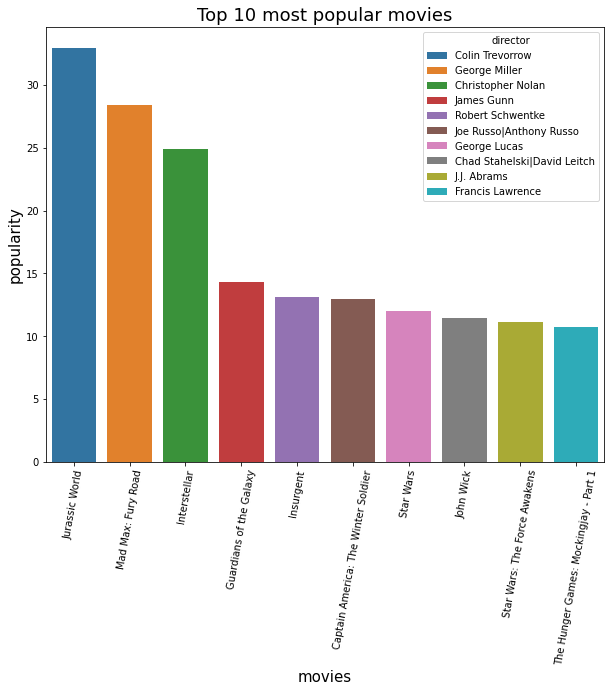

In [181]:
plt.figure(figsize=(10,8))
# bargraph that show the most popular movies based on popularity
sns.barplot(x="original_title", y="popularity", data=data_10, hue="director", dodge=False)
plt.xlabel('movies', fontsize=15)
plt.ylabel('popularity', fontsize=15)
plt.title('Top 10 most popular movies', fontsize=18)
plt.xticks(rotation=80)
plt.show()

###### This bar graph shows the list of top 10 most popular movies and thier director.

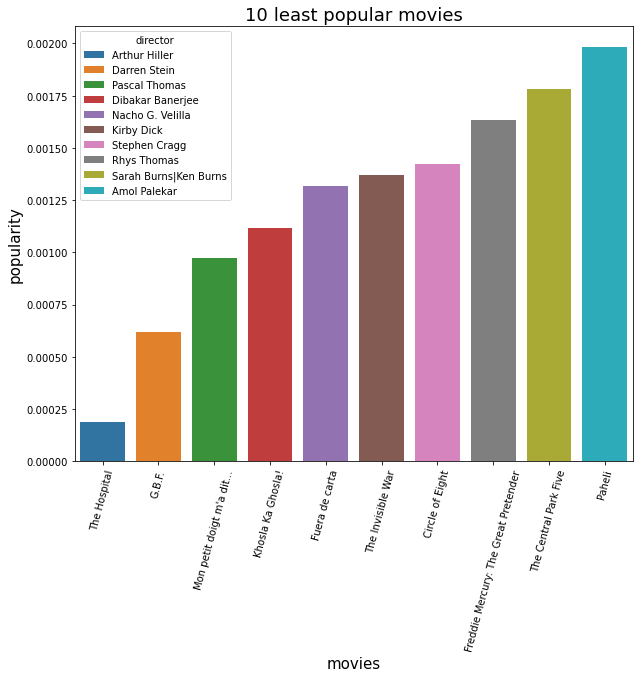

In [182]:
# Dataframe with th least popular movie
datalst_10 = df[(df.popularity == df['popularity'])].sort_values(by="popularity").head(10)
plt.figure(figsize=(10,8))
# bargraph that show the most popular movies based on popularity
sns.barplot(x="original_title", y="popularity", data=datalst_10, hue="director", dodge=False)
plt.xlabel('movies', fontsize=15)
plt.ylabel('popularity', fontsize=15)
plt.title('10 least popular movies', fontsize=18)
plt.xticks(rotation=75)
plt.show()

#### This bar graph shows the list of 10 least popular movies and thier director.

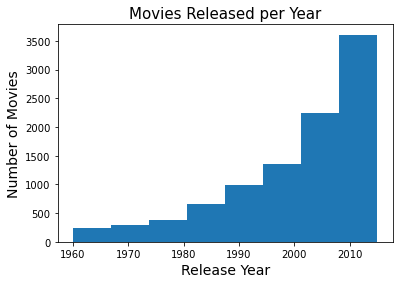

In [183]:
#create a histogram to show the num. of movie released per year
plt.hist(df['release_year'], bins=8)
plt.title('Movies Released per Year',fontsize=15)
plt.xlabel('Release Year', fontsize=14)
plt.ylabel('Number of Movies', fontsize=14);

The plot above shows the number of movies released each year. It shows that the number of movies increases as the year goes by.

<a id='conclusions'></a>
## Conclusions

#### Question 1: Which genres are most popular from year to year?
Without comparison, Drama, Action and Comedy respectively is the most popular genre from 1960 to 2015.
But when finding the most popular genre based on popularity scores, it varies and cannot be predicted.
The most popular genre 'Western' in the year 2015 has the highest maximum mean popularity score.
The most popular genre 'Drama' in the year 1960 has the lowest maximum mean popularity score.
Adventure appears the most popular genre in 19 random year and Western appears most popular in just one year.

#### Research Question 2: What is the most and least popular movie? what's the name of the movie director?
Jurassic World is the most popular movie which was release in the year 2015 and was directed by Colin Trevorrow.
The Hospital is the most popular movie which was released in 1971 and was directed by Arthur Hiller.
The top most popular movies are Jurassic World, Mad Max: Fury Road, Interstellar, Guardians of the Galaxy respectively.
About 75% of the movies released are between the year 2006 and 2015.


### Limitations
1. There were so many missing data and romoving them reduced the number of sample.
2. There were more than one genre to a movie, making analysis by choosing the first genre may not actually be a fair way to analyze the data.
3. Making analysis on this data was limited to the data. There was no way to bring instances from recently released movies that were not in the data set.

### References


1. TMDB Movies Dataset
2. Pandas Documentation
3. Matplotlib Documentation
4. Stack Overflow

In [153]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295